In [1]:
%matplotlib widget

In [2]:
import os, random, multiprocessing

import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd
import scipy.stats as sts

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

In [98]:
# from sklearn.utils.testing import ignore_warnings

DATADIR = "data"
LCFILE = os.path.join(DATADIR, "plasticc_train_lightcurves.csv.gz")
LCS = pd.read_csv(LCFILE).set_index(["object_id"])

NBIN_X = 2048
NBIN_Y = 256

NBAND = 6

start_mod = 59580.0343
end_mod = 60674.363
binned_mod, binned_mod_step = np.linspace(start_mod, end_mod, NBIN_X, retstep=True)

In [5]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [140]:
def bin(df):
    return None


def plot_hist(matrix):
    return None


ids = LCS.index.unique().values

# loop over object_id
for test_id in ids[0:1]:
    
    # multi-color light curve
    lc_full = LCS.query("object_id == @test_id")
    
    min_flux = lc_full.flux.min()
    peak_flux = lc_full.flux.max()
    
    # discretize flux column
    y_val, y_step = np.linspace(min_flux, peak_flux, NBIN_Y, retstep=True)
    
    # grid (3D cube)
    grid_full = np.zeros((NBIN_Y, NBIN_X, NBAND))
    
    # loop over passband (color filters)
    for passband in range(1,2):
        
        test_id = 3489
        #passband = 5
        
        # single-color light curve
        lc = lc_full.query("passband == @passband")
        
        # discretize flux column
        # Return the indices of the bins to which each value in input array belongs.
        y_select = np.digitize(lc.flux, y_val, right=True)  # right=True: bins[i-1] < x <= bins[i]
        print(y_select)
        print(lc.flux.max(), y_val.max())
        print(y_step)
        print(y_val[y_select], lc.flux)
        print(len(lc.flux.values))
        
        # normalized gaussian
        flux_grey_val = np.zeros((NBIN_Y, len(lc)))
        for point, (mu, sig, y_idx) in enumerate(zip(lc.flux.values, lc.flux_err.values, y_select)):
            mu_pix = y_val[y_idx] - y_step/2
            print(mu-mu_pix, abs(mu-mu_pix) <= y_step/2)
            flux_grey_val[:, point] = gaussian(y_val, mu_pix, sig)
        
        # discretize mjd column
        x_select = np.digitize(lc.mjd.values, binned_mod)
        
        grid_full[y_select, x_select, passband] = 1
        print(len(x_select), len(y_select))
        
        """
        pix_to_flux = peak_flux / NBIN_Y
        print(f"Peak flux: {peak_flux}")
        print(f"Flux increase per Pixel: {pix_to_flux}")

        bins = np.linspace(start=start_mod, stop=end_mod, num=NBIN_X) - start_mod

        hist = np.histogram2d(x=lc.mjd, y=lc.flux, bins=[NBIN_X, NBIN_Y])[0]

        k = 0
        for i in range(NBIN_X):
            column = hist[i, :]
            if np.sum(column) == 1:
                flux = lc.flux.values[k]
                err = lc.flux_err.values[k]
                normaldist = sts.norm(loc=flux, scale=err)
                for l in column:
                    if l == 1:
                        central_pixel = l
                k += 1
        """
# fig, ax = plt.subplots()
# ax.hist2d(x=lc.mjd, y=lc.flux, bins=[NBIN_X, 256])
# fig.savefig("test.png")

[ 42   6  42  41  26  95 165 179  99  84   0 134  22  14 191 253  23  28
 255 146  97  52  33  27 151  39   4 111  11 200 254   1 106   2 210 211
   1 162 255  69  11 155 242   3 167 180   4  19  42  20 255 190 104 170
 226  82  72 248]
660.626343 660.626343
6.906142768627451
[ -810.38206672 -1059.00320639  -810.38206672  -817.28820949
  -920.88035102  -444.35649998    39.07349382   135.75949258
  -416.73192891  -520.32407044 -1100.440063    -175.016932
  -948.50492209 -1003.75406424   218.63320581   646.81405746
  -941.59877932  -907.06806548   660.626343     -92.14321878
  -430.54421444  -741.32063903  -872.53735164  -913.97420825
   -57.61250494  -831.10049502 -1072.81549193  -333.85821568
 -1024.47249255   280.78849073   653.72020023 -1093.53392023
  -368.38892953 -1086.62777746   349.84991841   356.75606118
 -1093.53392023    18.35506552   660.626343    -623.91621196
 -1024.47249255   -29.98793386   570.84648701 -1079.72163469
    52.88577936   142.66563535 -1072.81549193  -969.22

In [123]:
lc.flux.min() == lc_full.flux.min()

True

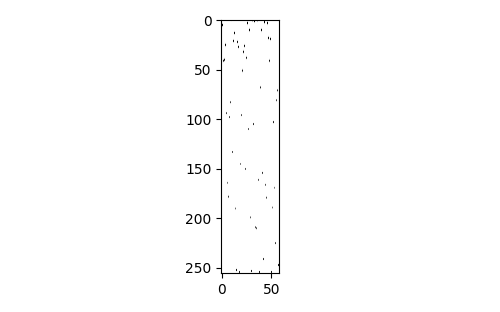

In [142]:
num = 3
plt.close(num)
fig, ax = plt.subplots(num=num, figsize=(5,5./1.6), tight_layout=True)

ax.imshow(
    #grid_full[:,:,2],
    flux_grey_val,
    cmap="Greys"
)

In [63]:
NBIN_X

2048

In [57]:
select = np.digitize(lc.mjd.values,binned_mod)

In [58]:
img = np.zeros((NBIN_Y, NBIN_X))

In [59]:
img[:,select] = flux_grey_val

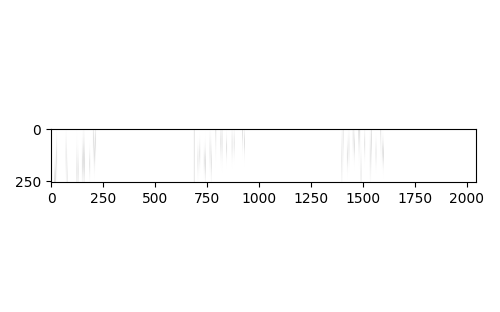

In [60]:
num = 4
plt.close(num)
fig, ax = plt.subplots(num=num, figsize=(5,5./1.6), tight_layout=True)

ax.imshow(
    img,
    cmap="Greys"
)

In [64]:
img.shape

(256, 2048)